## Python notebook for programming assignment with the whole linear model, predictions, and evaluation of a multiple linear regression model for the prediction of demand for shared bikes by M Sreenu

## Step 1: Reading, Understanding and Preping the Data

-  Observe Data and Columns
-  Number of Entries and Shape of Data
-  Numeric and Categorical terms


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Importing the dataset
data = pd.read_csv("day.csv")

#Undertanding the attributes available in the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the shape of dataset
data.shape

(730, 16)

In [5]:
# checking for the null values in column dataset

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Identify the columns having the missing values or errors in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Describe the data

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Data Preparation or Cleaning

-  Remove irrelevant columns (if any)
-  Data Typecasting to numeric or string (if not properly formattted already)
-  Data visualisation
-  Create Dummy variables
-  Create Derived Columns


In [8]:
# Dropping the unwanted columns
# Column instant is the index of rows, which is not required
# dteday has date which is of no use when we are given with year and month columns, and using them makes more sense
# casual and registered are the breakup by category for cnt column. As cnt is our dependent variable, 'casual' and 'registered' are redundant columns. We need to drop them.
data.drop(['casual', 'registered','instant','dteday'], inplace=True, axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Replacing the columns to a readable text with the help of Readme.txt file

# Mapping the season column
data.season.replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)

# Mapping the weathersit column
data.weathersit.replace([1,2,3,4],['clear','cloudy','lightrain','heavyrain'],inplace=True)

# Mapping the month column
data.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],inplace=True)

# Mapping weekday column
data.weekday.replace([1,2,3,4,5,6,0],['monday','tuesday','wednesday','thrusday','friday','satuarday','sunday'],inplace=True)

# Check what the dataset 'status' looks like
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,satuarday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualistion

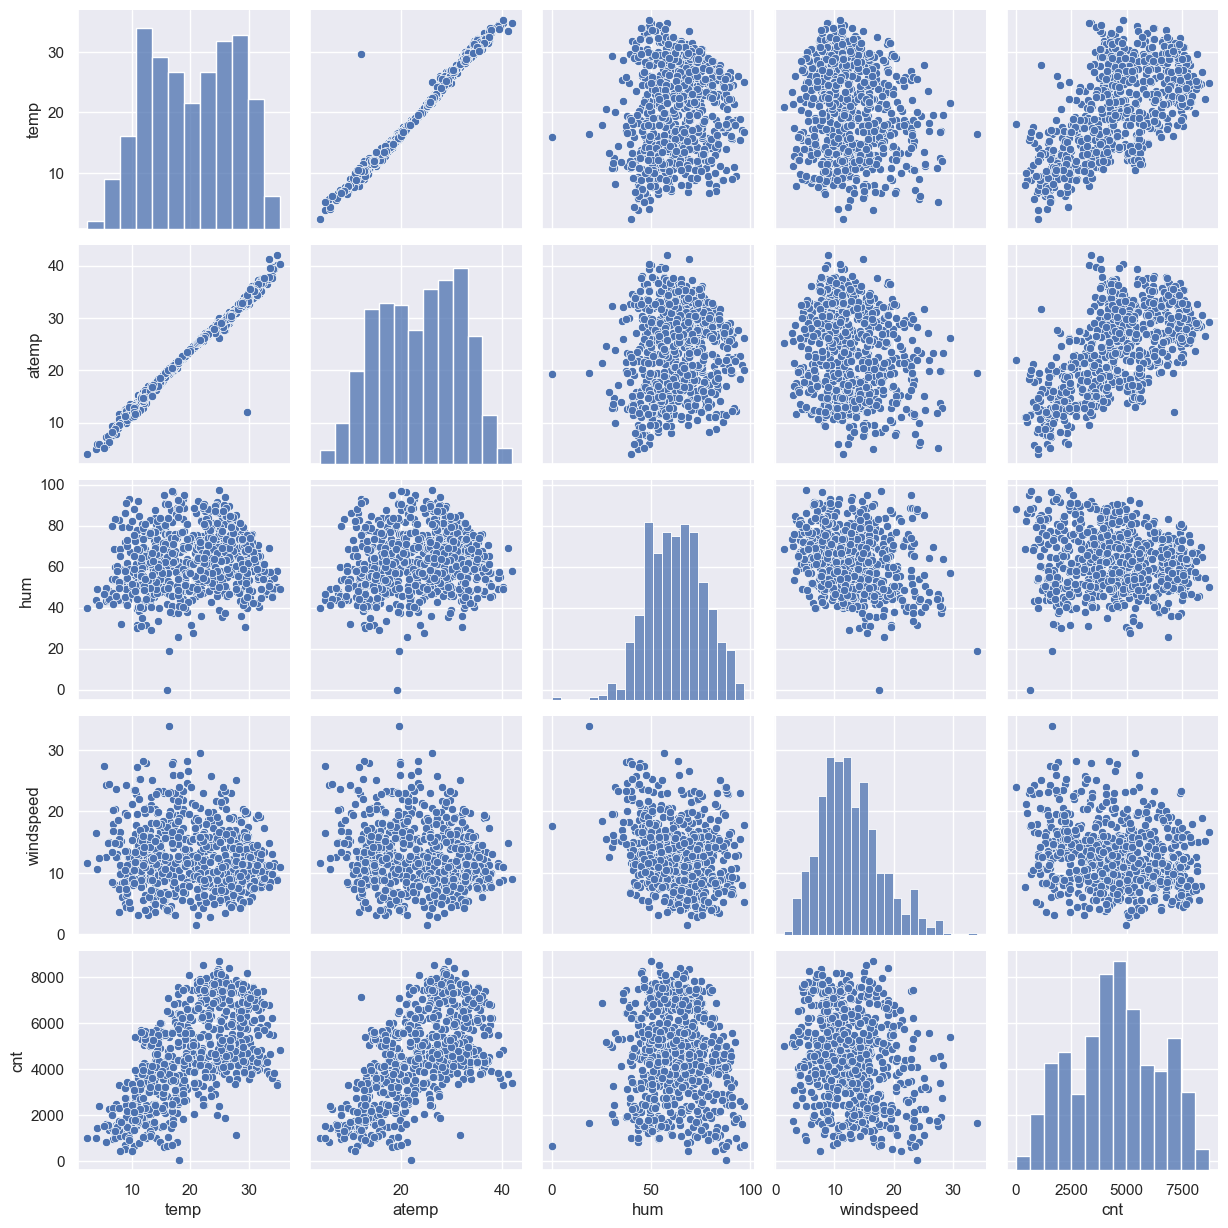

In [10]:
# set style 
sns.set(style='darkgrid')

#Visualize the data to check multicollinearity
continuous_variables = data[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(continuous_variables)
plt.show()

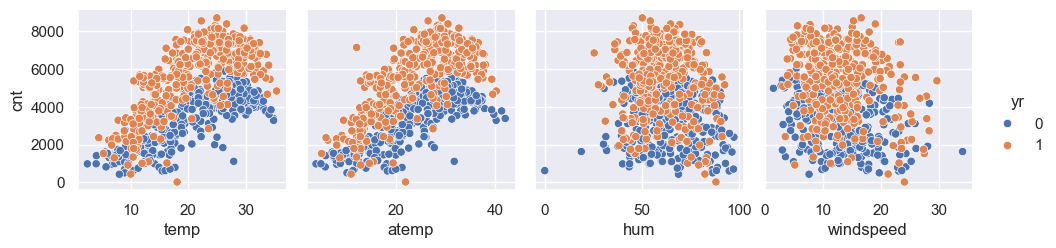

In [11]:
#Visualizing the data using pairplot for numeric variables
sns.pairplot(data=data,x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt', hue='yr')
plt.show()

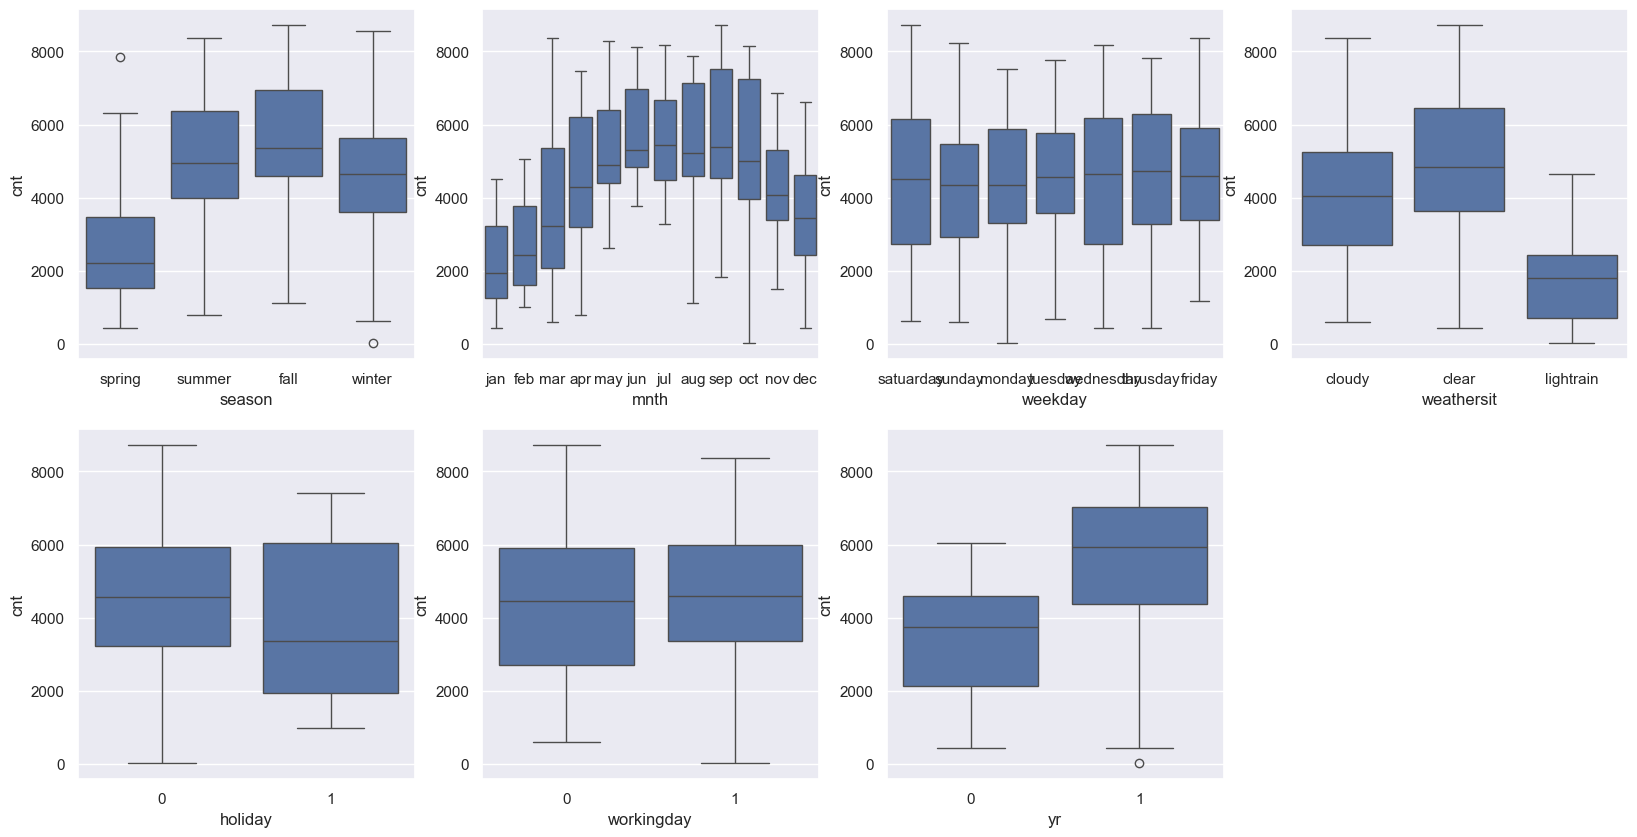

In [12]:
# Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable.

plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.show()

In [13]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=data)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=data, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

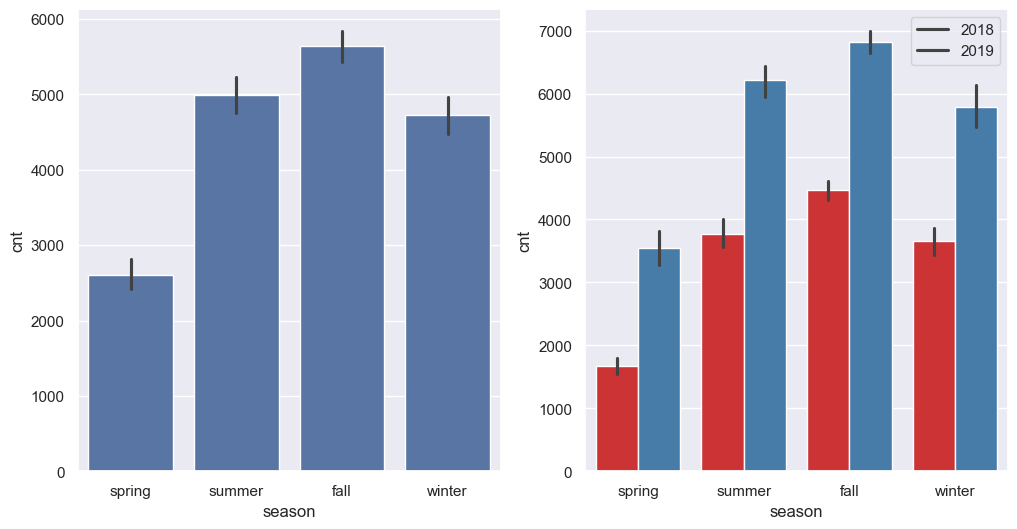

In [14]:
# plotting visualization for season column

plot_cat_columns('season')

#### Fall season seems to have higher booking than any other season. 
#### And, in each season the booking count has increased drastically when comparing 2018 to 2019.

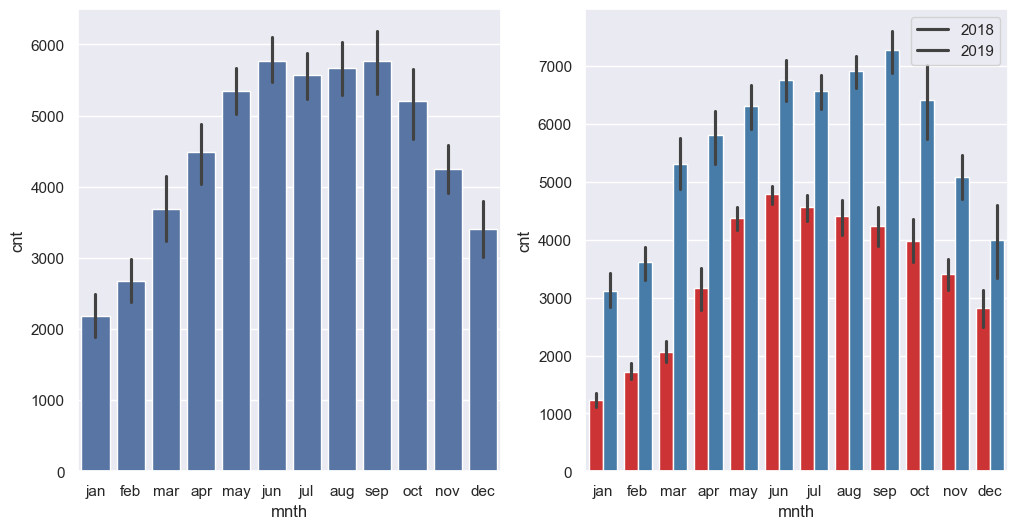

In [15]:
# plotting visualization for month column

plot_cat_columns('mnth')

#### Most of the bookings has been done during the months of May through October.Trend seems to be increasing from the beginning of the year till June, where is seem to be steady till September and from there the trend started declining till it reaches yearend.
#### Number of booking for each month seems to have significantly increased from 2018 to 2019.

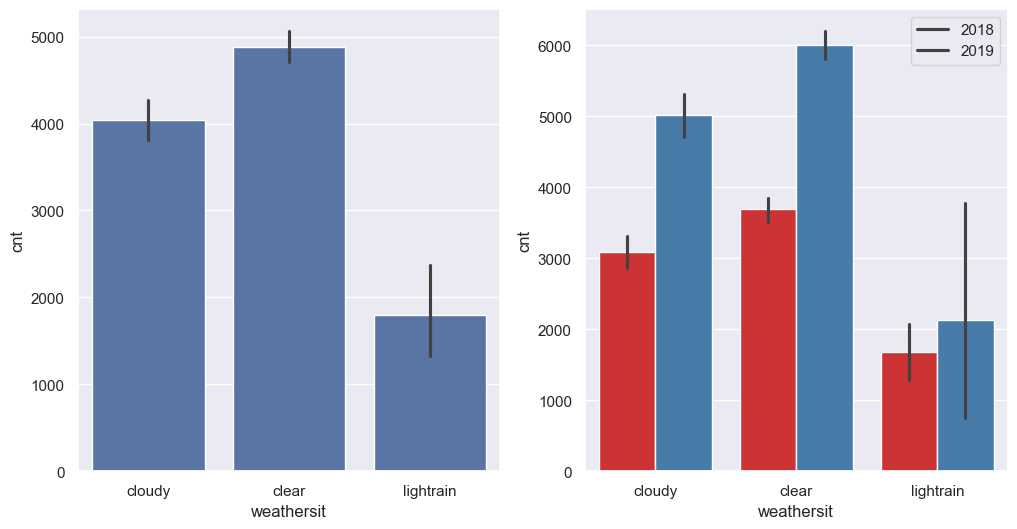

In [16]:
# Plotting visualization for weathersit column
plot_cat_columns('weathersit')

#### It is obvious that Clear weather have attracted more bookings than any other weather situation. And in comparison to previous year, bookings increased for all weather situations in 2019 with its own variations.

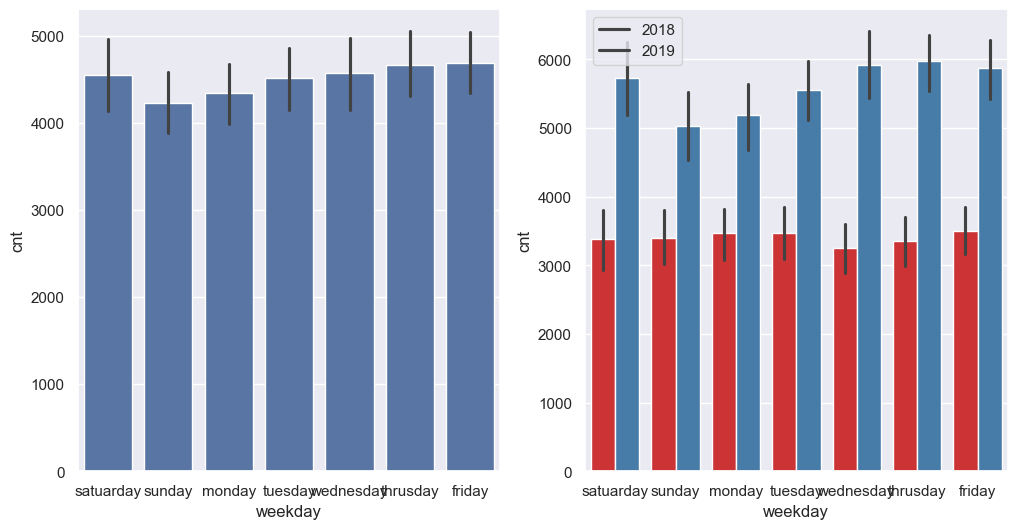

In [17]:
# Plotting visualization for weekday column
plot_cat_columns('weekday')

#### Begining with Sunday, seems like the bookings are gradually increasing till Thursday, and were stable through Saturday. We can say that the there are low bookings in the beginning of the week are are gradually increasing towards weekend.

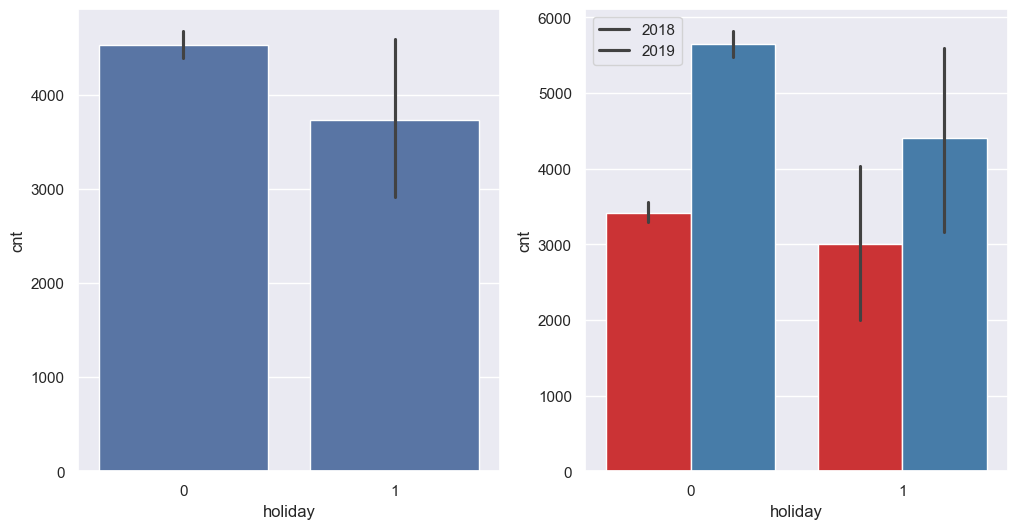

In [18]:
# Plotting visualization for holiday column
plot_cat_columns('holiday')

#### Booking are reasonably as on holidays, as decline in travel frequency and lack of regular transits may be due to consumers focusing more on family gatherings and leisure activities.

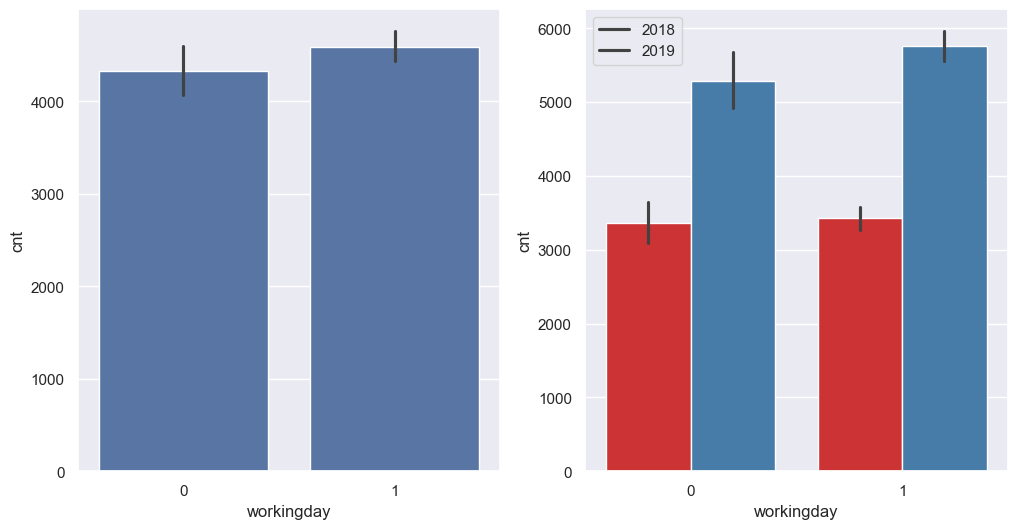

In [19]:
# Plotting visualization for workingday column
plot_cat_columns('workingday')

#### Booking seemed to be almost equal regardless of working or non-working day. However, the count has significantly increased from 2018 to 2019.

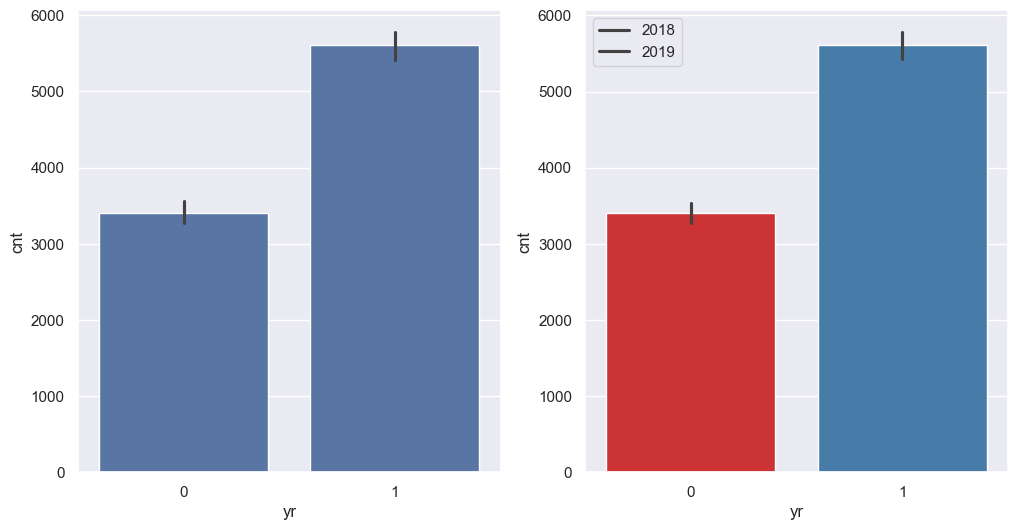

In [20]:
# Plotting visualization for year column
plot_cat_columns('yr')

#### 2019 has higher number of bookings from the 2018, which shows progress in terms of business.

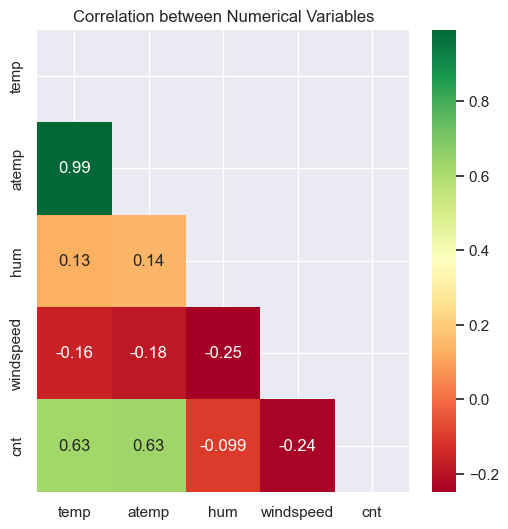

In [21]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(data[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### There is linear relationship between temp and atemp. Both the parameters cannot be used in the model due to multicolinearity. We will drop the atemp.


In [22]:
# Removing atemp as it is highly correlated to temp
data.drop('atemp', axis=1,inplace=True)

## Data Preparation - Creating Dummy variables

In [23]:
def add_dummy(data, column_name):
    dummy_column = pd.get_dummies(data[column_name], drop_first=True)
    data=data.drop(column_name, axis=1)
    data=pd.concat([data,dummy_column],axis=1)
    return data


In [24]:
data=add_dummy(data,"season")
data=add_dummy(data,"weathersit")
data=add_dummy(data,"mnth")
data=add_dummy(data,"weekday")
data.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


# Model building and evaluation
-  Split the dataset between train and test
-  Scaling
-  Build the model


In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

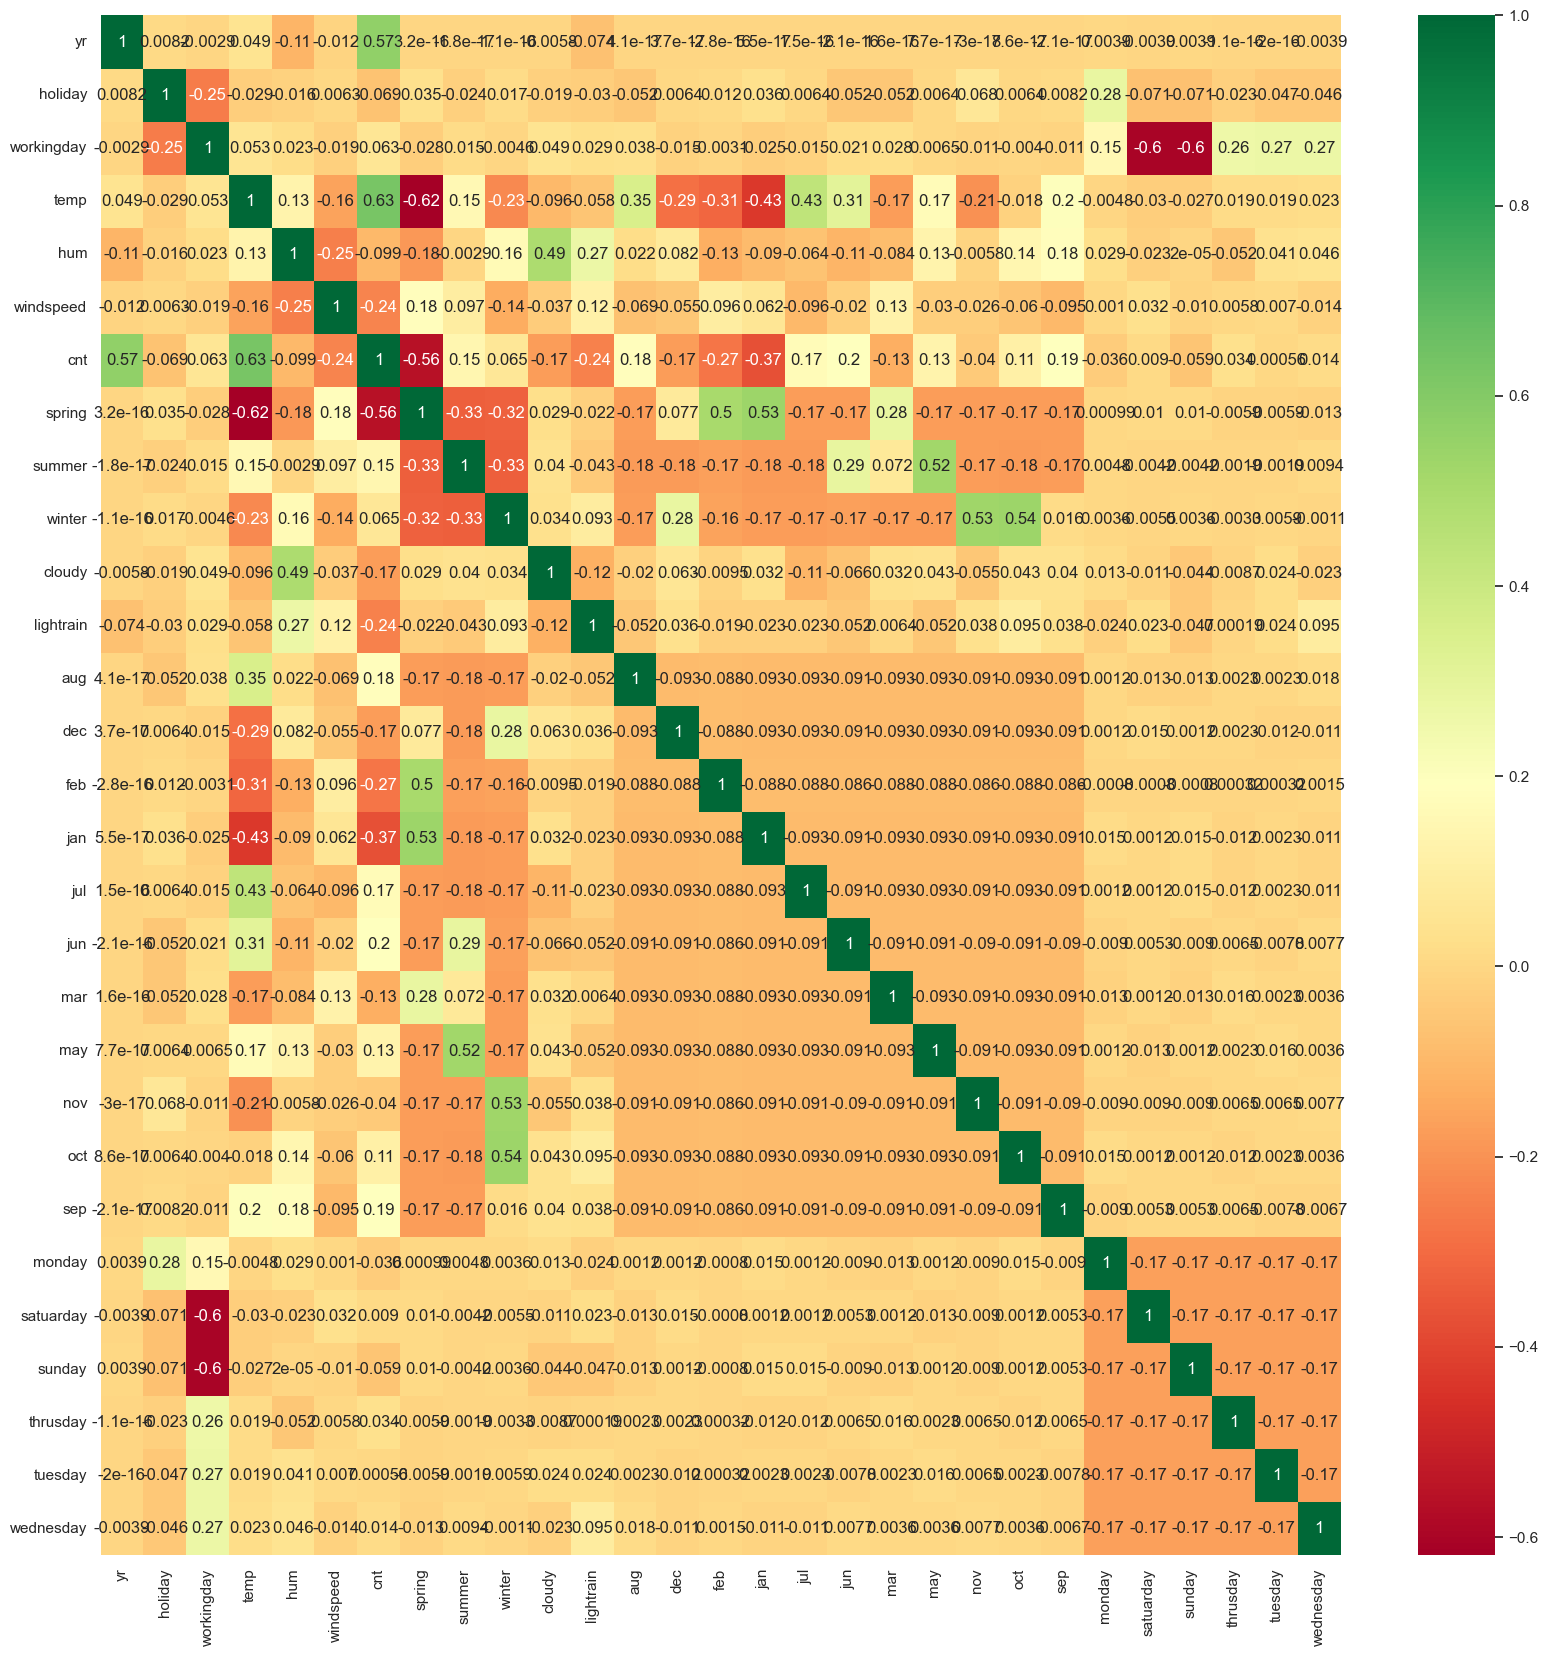

In [27]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap="RdYlGn")
plt.show()

### temp and atemp are having the highest correlation with the cnt attribute. One approach could be that we can start with temp attribute and will try to get the linear dependency by increasing the attributes step-by-step. But we will starting with all the attributes and will try to eliminate the less significant attributes.

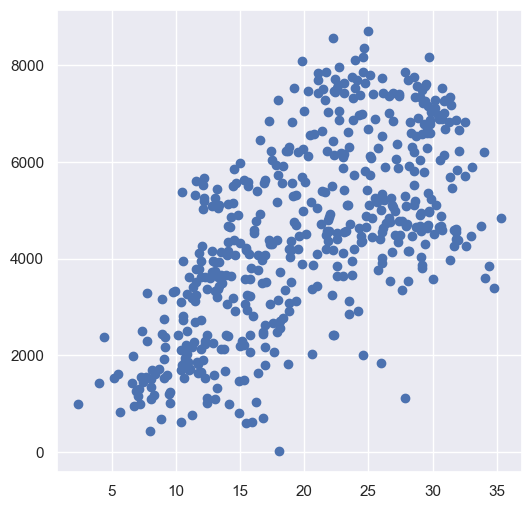

In [28]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Visualization confirms the positive correlation between temp and cnt.

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scale_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

In [30]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building

In [32]:
import statsmodels.api as sm

def build_model(X, y):
    # Add a constant
    X = sm.add_constant(X)
    # Create a first fitted model
    lr = sm.OLS(y, X).fit()
    print(lr.summary())
    return X
    
def calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [33]:
np.asarray(data)

array([[0, 0, 0, ..., False, False, False],
       [0, 0, 0, ..., False, False, False],
       [0, 0, 1, ..., False, False, False],
       ...,
       [1, 0, 0, ..., False, False, False],
       [1, 0, 0, ..., False, False, False],
       [1, 0, 1, ..., False, False, False]], dtype=object)

In [34]:
X_train = build_model(X_train.astype(float), y_train.astype(float))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          8.74e-182
Time:                        02:41:49   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.035      6.955      0.0

### 84.5% Adjusted R-square is quite good but still we will try to reduce the no of features and will try to get the relevant attributes only. Currently we are having 29 attributes which is not relevant to go manually eleminate. So, we would be using Recursive Feature Elemination to select features. We would be starting 15 features.

## Building model with RFE

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15) # running RFE
rfe = rfe.fit(X_train, y_train)


In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'summer', 'lightrain', 'aug',
       'feb', 'jan', 'jul', 'oct', 'sep', 'satuarday', 'sunday'],
      dtype='object')

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          2.12e-155
Time:                        02:41:49   Log-Likelihood:                 428.77
No. Observations:                 510   AIC:                            -829.5
Df Residuals:                     496   BIC:                            -770.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1057      0.016      6.766      0.0

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = calculate_VIF(X_train_rfe)
print(vif)

      Features   VIF
2      holiday   inf
3   workingday   inf
13   satuarday   inf
14      sunday   inf
4         temp  3.12
10         jul  2.02
7          aug  2.00
5       summer  1.76
12         sep  1.53
9          jan  1.45
11         oct  1.29
8          feb  1.25
6    lightrain  1.04
1           yr  1.02
0        const  0.00


### aug is having the biggest biggest value and greater then 0.05, So dropping aug attribute

In [40]:
X_train_new = X_train_rfe.drop(["aug"], axis = 1)

## Model 2

In [41]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     149.9
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          1.72e-156
Time:                        02:41:49   Log-Likelihood:                 428.75
No. Observations:                 510   AIC:                            -831.5
Df Residuals:                     497   BIC:                            -776.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1066      0.015      7.186      0.0

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

      Features   VIF
2   workingday  9.94
11   satuarday  2.85
12      sunday  2.81
3         temp  1.95
7          jan  1.44
8          jul  1.42
1      holiday  1.30
4       summer  1.30
6          feb  1.25
10         sep  1.21
9          oct  1.16
5    lightrain  1.04
0           yr  1.02


### holiday is having the biggest value and greater then 0.05, So droping holiday attribute.

In [43]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

## Model 3

In [44]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     149.9
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          1.72e-156
Time:                        02:41:50   Log-Likelihood:                 428.75
No. Observations:                 510   AIC:                            -831.5
Df Residuals:                     497   BIC:                            -776.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0800      0.033      2.391      0.0

In [45]:
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

      Features    VIF
2         temp  10.75
1   workingday   7.95
10   satuarday   2.44
11      sunday   2.41
0           yr   2.06
3       summer   1.72
7          jul   1.51
6          jan   1.43
9          sep   1.32
8          oct   1.26
5          feb   1.24
4    lightrain   1.07


### temp is having the biggest VIF value and greater then 5, So dropping temp attribute

In [47]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

## Model 4

In [48]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     92.93
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          4.28e-113
Time:                        02:54:37   Log-Likelihood:                 323.09
No. Observations:                 510   AIC:                            -622.2
Df Residuals:                     498   BIC:                            -571.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.037      8.105      0.0

In [49]:
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

      Features   VIF
1   workingday  2.88
0           yr  2.00
2       summer  1.67
10      sunday  1.41
9    satuarday  1.38
7          oct  1.26
5          jan  1.22
6          jul  1.21
8          sep  1.20
4          feb  1.17
3    lightrain  1.07


### sunday is having the biggest value and greater then 0.05, So dropping sunday attribute

In [50]:
X_train_new = X_train_new.drop(["sunday"], axis = 1)

## Model 5

In [51]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     101.9
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          9.19e-114
Time:                        02:54:56   Log-Likelihood:                 322.26
No. Observations:                 510   AIC:                            -622.5
Df Residuals:                     499   BIC:                            -575.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3452      0.017     20.092      0.0

In [52]:
X_train_new_without_const = X_train_new.drop("const", axis=1)
vif = calculate_VIF(X_train_new_without_const)
print(vif)

     Features   VIF
1  workingday  2.34
0          yr  1.81
2      summer  1.49
9   satuarday  1.27
7         oct  1.17
5         jan  1.16
8         sep  1.16
6         jul  1.14
4         feb  1.11
3   lightrain  1.07


In [53]:
X_train_new.head()

,const,yr,workingday,summer,lightrain,feb,jan,jul,oct,sep,satuarday
653,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Fow the above model summary we are having 10 features and all the p-values are below 0.05 and corrsponding VIF values are less then 5 which is all values lies within the expected range. 
### We can say this will be our final model

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [54]:
lm=sm.OLS(y_train,X_train_new).fit()
y_train_Pred_cnt = lm.predict(X_train_new)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     101.9
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          9.19e-114
Time:                        02:55:08   Log-Likelihood:                 322.26
No. Observations:                 510   AIC:                            -622.5
Df Residuals:                     499   BIC:                            -575.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3452      0.017     20.092      0.000       0.311       0.379
yr             0.2538      0.012     21.969      0.000       0.231       0.277
workingday     0.0563      0.016      3.579      0.000       0.025       0.087
summer         0.0467      0.015      3.089      0.002       0.017       0.076
lightrain     -0.3103      0.035     -8.949      0.000      -0.378      -0.242
feb           -0.2114      0.024     -8.687      0.000      -0.259      -0.164
jan           -0.2740      0.022    -12.645      0.000      -0.317      -0.231
jul            0.1172      0.023      5.106      0.000       0.072       0.162
oct            0.0877      0.022      3.965      0.000       0.044       0.131
sep            0.1589      0.023      7.060      0.000       0.115       0.203
satuarday      0.0519      0.020      2.552      0.011       0.012       0.092
==============================================================================
Omnibus:                       58.733   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.150
Skew:                          -0.784   Prob(JB):                     1.19e-19
Kurtosis:                       4.281   Cond. No.                         8.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Errors')

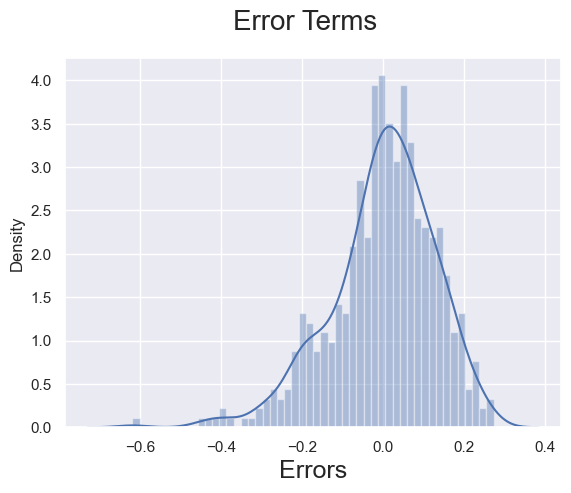

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_Pred_cnt), bins = 50)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)     

Text(0, 0.5, 'Error')

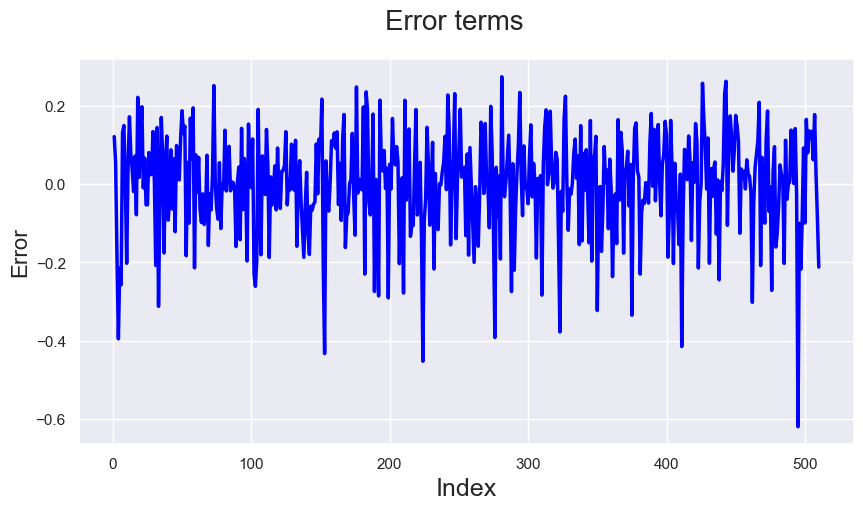

In [58]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (10,5))
plt.plot(c,(y_train - y_train_Pred_cnt), color="blue", linewidth=2.5, linestyle="-")

fig.suptitle('Error terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Error', fontsize=16)  

#### Printing Actual data (with color blue) and Predicted data (with color red) within same plot to compare.

Text(0, 0.5, 'Views')

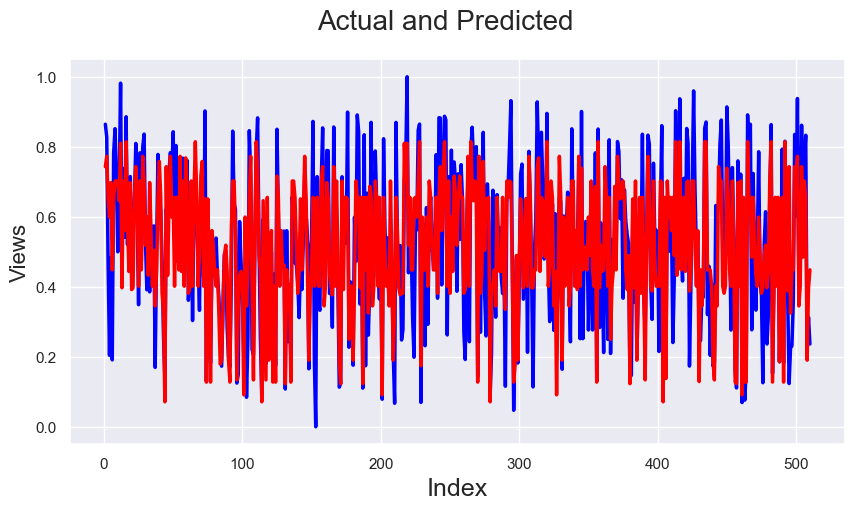

In [59]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (10,5))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_Pred_cnt, color="red",  linewidth=2.5, linestyle="-")
# Plot heading
fig.suptitle('Actual and Predicted', fontsize=20) 
# X-label
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=16)   

In [60]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scale_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,monday,satuarday,sunday,thrusday,tuesday,wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,False,False,False,...,False,False,False,False,True,False,False,False,False,False
535,1,0,1,0.901354,0.610133,0.153728,0.712034,False,True,False,...,False,False,False,False,False,False,False,False,False,True
299,0,0,1,0.511964,0.837699,0.334206,0.303382,False,False,True,...,False,False,True,False,False,False,False,True,False,False
221,0,0,1,0.881625,0.437098,0.339570,0.547400,False,False,False,...,False,False,False,False,False,False,False,False,False,True
152,0,0,1,0.817246,0.314298,0.537414,0.569029,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [61]:
# Info of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   hum         219 non-null    float64
 5   windspeed   219 non-null    float64
 6   cnt         219 non-null    float64
 7   spring      219 non-null    bool   
 8   summer      219 non-null    bool   
 9   winter      219 non-null    bool   
 10  cloudy      219 non-null    bool   
 11  lightrain   219 non-null    bool   
 12  aug         219 non-null    bool   
 13  dec         219 non-null    bool   
 14  feb         219 non-null    bool   
 15  jan         219 non-null    bool   
 16  jul         219 non-null    bool   
 17  jun         219 non-null    bool   
 18  mar         219 non-null    bool   
 19  may         219 non-null    bool 

#### All values are non null. Dividing the test into X_test and y_test

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
X_test=sm.add_constant(X_test)

In [64]:
X_test=X_test[X_train_new.columns]
y_test_Pre_cnt = lm.predict(X_test)

Text(0.5, 0, 'Errors')

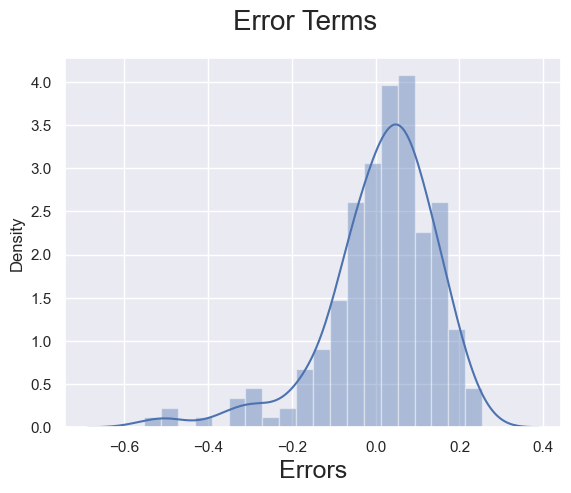

In [65]:
# Plot the histogram of the error terms test data
fig = plt.figure()
sns.distplot((y_test - y_test_Pre_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0, 0.5, 'y_pred')

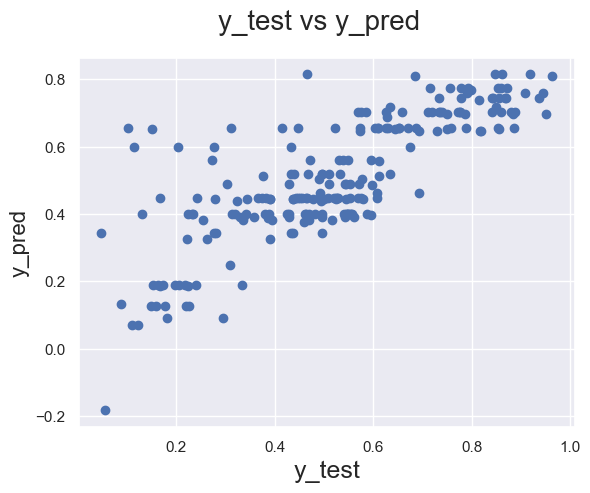

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_Pre_cnt)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

From above plot we can say that actual value and predicted values arehighly correlated.

R-Square for test

In [67]:
from sklearn.metrics import r2_score
RSq=r2_score(y_true=y_test,y_pred=y_test_Pre_cnt)
RSq

0.6324744122241006

In [68]:
N=219
P=10
adjr=1-((1-RSq)*(N-1)/(N-P-1))
adjr

0.6148049128117978

Text(0, 0.5, 'Views')

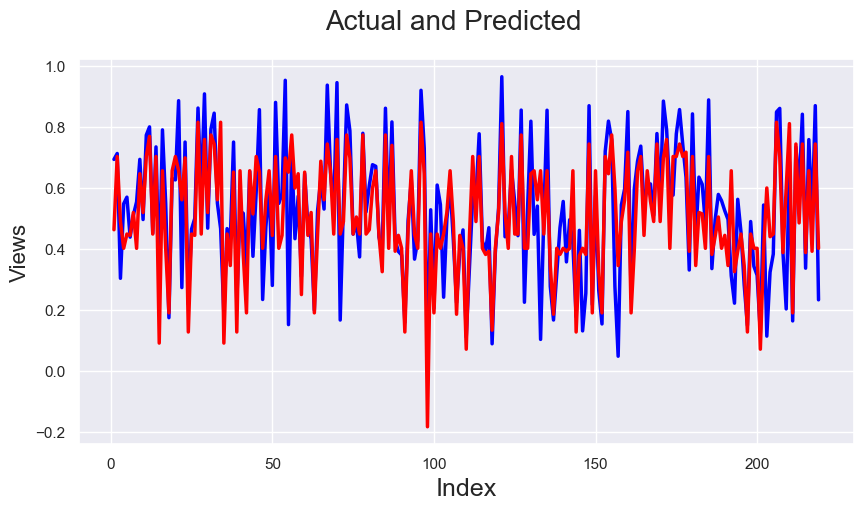

In [69]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize = (10,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_Pre_cnt, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)   

Actual data and predicted values are overlapping to the most extent. So we can say that the built model is good.

# Final Analysis

-  Train R-squared:               0.671
-  Train Adjusted R-square:       0.665
-  Test R-squared: 	              0.632
-  Train Adjusted R-square:       0.615
-  As there is less diffrence between R-Square and adjusted R-Square for both datasets and diffrence between test and train adjusted R-Square is equal to 0.05, we can say that it is under acceptable threshold and Moderately Overfitting model.